In [39]:
import pandas as pd
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
# Reading "1980-2014 Election Data.csv" file from Github
df = pd.read_csv("https://raw.githubusercontent.com/mmingoia/HTML_ML_Group_Project/MikeMingoia/1980-2014%20Election%20Data.csv")

In [5]:
df

,Year,ICPSR State Code,Alphanumeric State Code,Unnamed: 3,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
0,2014,0,0,United States,36.7%,36.0%,33.2%,"83,262,122","81,687,059","227,157,964","245,712,915",8.4%,"1,493,706","2,298,993","548,576","3,329,718","5,345,814"
1,2014,41,1,Alabama,33.2%,32.9%,31.5%,"1,191,274","1,180,413","3,588,783","3,751,844",2.5%,"31,691","53,640","8,097","69,826",NaN
2,2014,81,2,Alaska,54.8%,54.2%,51.0%,"285,431","282,382","520,562","553,473",3.9%,"5,216","7,077","2,210","11,389",NaN
3,2014,61,3,Arizona,34.1%,33.4%,29.5%,"1,537,671","1,506,416","4,510,186","5,110,890",10.1%,"37,516","73,232","7,502","86,028",NaN
4,2014,42,4,Arkansas,40.3%,40.1%,37.5%,"852,642","848,592","2,117,881","2,263,040",4.0%,"17,756","28,192","21,743","55,287",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1980,40,47,Virginia,NaN,48.7%,47.5%,NaN,"1,866,032","3,830,887","3,927,383",2.0%,"8,920","11,463","4,783","19,435",NaN
932,1980,73,48,Washington,60.6%,59.6%,57.4%,"1,772,904","1,742,394","2,923,670","3,037,193",2.9%,"4,399","12,527","14,669","25,332",NaN
933,1980,56,49,West Virginia,53.5%,53.2%,52.8%,"742,150","737,715","1,387,231","1,396,595",0.5%,"1,257","2,650",475,"3,057",NaN
934,1980,25,50,Wisconsin,NaN,68.4%,67.4%,NaN,"2,273,221","3,322,053","3,371,087",1.0%,"3,980","19,088","2,639","16,163",NaN


In [2]:
df1 = pd.read_csv("https://ivote.s3.us-east-2.amazonaws.com/epi+indicators-all+years.csv")

In [3]:
df1

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,AK,Alaska,2008,0,0,NaN,NaN,NaN,0.068102,0.062139,...,1.0,0.152142,NaN,0.052107,NaN,0,5.712700,0.003495,0.875693,0.682773
1,AK,Alaska,2010,1,1,0.0,1.0,0,0.082050,0.049773,...,1.0,NaN,0.093135,NaN,0.035279,0,NaN,NaN,0.835431,0.525560
2,AK,Alaska,2012,1,1,0.0,1.0,0,0.097063,0.060354,...,1.0,0.120155,NaN,0.063834,NaN,0,3.656872,0.003974,0.868472,0.591806
3,AK,Alaska,2014,1,1,0.0,1.0,0,0.086496,0.056739,...,1.0,NaN,0.093120,NaN,0.020184,0,4.156598,NaN,0.826949,0.543818
4,AL,Alabama,2008,0,0,NaN,NaN,NaN,0.000439,NaN,...,0.0,0.226150,NaN,0.075939,NaN,0,14.260800,NaN,0.852208,0.609528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,WV,West Virginia,2014,1,1,0.0,1.0,1,0.004942,0.006877,...,1.0,NaN,0.178077,NaN,0.034844,0,3.771747,NaN,0.756622,0.311667
200,WY,Wyoming,2008,1,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.128153,NaN,0.059821,NaN,0,5.620379,0.005349,0.782883,0.631045
201,WY,Wyoming,2010,1,0,0.0,0.0,0,NaN,NaN,...,1.0,NaN,0.133298,NaN,0.020943,0,NaN,NaN,0.725026,0.458080
202,WY,Wyoming,2012,1,0,0.0,0.0,0,NaN,NaN,...,1.0,0.115326,NaN,0.041794,NaN,0,4.516539,0.006542,0.746732,0.592977


In [4]:
# Finding data type for all columns
df1.dtypes

state_abbv                       object
state_fips                       object
year                              int64
website_pollingplace              int64
website_reg_status               object
website_precinct_ballot         float64
website_absentee_status         float64
website_provisional_status       object
reg_rej                         float64
prov_partic                     float64
prov_rej_all                    float64
abs_rej_all_ballots             float64
abs_nonret                      float64
uocava_rej                      float64
uocava_nonret                   float64
eavs_completeness               float64
post_election_audit             float64
nonvoter_illness_onyear_pct     float64
nonvoter_illness_offyear_pct    float64
nonvoter_reg_onyear_pct         float64
nonvoter_reg_offyear_pct        float64
online_reg                       object
wait                            float64
residual                        float64
pct_reg_of_vep_vrs              float64


In [ ]:
# Changing data type for Online_reg column
df1["online_reg"] = df1["online_reg"].astype(float)

In [16]:
df1_new = df1.replace(np.nan,0)
# df1_new1 = df1.replace('NaN',0)

df1_new

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,AK,Alaska,2008,0,0,0.0,0.0,0,0.068102,0.062139,...,1.0,0.152142,0.000000,0.052107,0.000000,0,5.712700,0.003495,0.875693,0.682773
1,AK,Alaska,2010,1,1,0.0,1.0,0,0.082050,0.049773,...,1.0,0.000000,0.093135,0.000000,0.035279,0,0.000000,0.000000,0.835431,0.525560
2,AK,Alaska,2012,1,1,0.0,1.0,0,0.097063,0.060354,...,1.0,0.120155,0.000000,0.063834,0.000000,0,3.656872,0.003974,0.868472,0.591806
3,AK,Alaska,2014,1,1,0.0,1.0,0,0.086496,0.056739,...,1.0,0.000000,0.093120,0.000000,0.020184,0,4.156598,0.000000,0.826949,0.543818
4,AL,Alabama,2008,0,0,0.0,0.0,0,0.000439,0.000000,...,0.0,0.226150,0.000000,0.075939,0.000000,0,14.260800,0.000000,0.852208,0.609528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,WV,West Virginia,2014,1,1,0.0,1.0,1,0.004942,0.006877,...,1.0,0.000000,0.178077,0.000000,0.034844,0,3.771747,0.000000,0.756622,0.311667
200,WY,Wyoming,2008,1,0,0.0,0.0,0,0.000000,0.000000,...,0.0,0.128153,0.000000,0.059821,0.000000,0,5.620379,0.005349,0.782883,0.631045
201,WY,Wyoming,2010,1,0,0.0,0.0,0,0.000000,0.000000,...,1.0,0.000000,0.133298,0.000000,0.020943,0,0.000000,0.000000,0.725026,0.458080
202,WY,Wyoming,2012,1,0,0.0,0.0,0,0.000000,0.000000,...,1.0,0.115326,0.000000,0.041794,0.000000,0,4.516539,0.006542,0.746732,0.592977


In [24]:
df1_new

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,AK,Alaska,2008,0,0,0.0,0.0,0,0.068102,0.062139,...,1.0,0.152142,0.000000,0.052107,0.000000,0,5.712700,0.003495,0.875693,0.682773
1,AK,Alaska,2010,1,1,0.0,1.0,0,0.082050,0.049773,...,1.0,0.000000,0.093135,0.000000,0.035279,0,0.000000,0.000000,0.835431,0.525560
2,AK,Alaska,2012,1,1,0.0,1.0,0,0.097063,0.060354,...,1.0,0.120155,0.000000,0.063834,0.000000,0,3.656872,0.003974,0.868472,0.591806
3,AK,Alaska,2014,1,1,0.0,1.0,0,0.086496,0.056739,...,1.0,0.000000,0.093120,0.000000,0.020184,0,4.156598,0.000000,0.826949,0.543818
4,AL,Alabama,2008,0,0,0.0,0.0,0,0.000439,0.000000,...,0.0,0.226150,0.000000,0.075939,0.000000,0,14.260800,0.000000,0.852208,0.609528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,WV,West Virginia,2014,1,1,0.0,1.0,1,0.004942,0.006877,...,1.0,0.000000,0.178077,0.000000,0.034844,0,3.771747,0.000000,0.756622,0.311667
200,WY,Wyoming,2008,1,0,0.0,0.0,0,0.000000,0.000000,...,0.0,0.128153,0.000000,0.059821,0.000000,0,5.620379,0.005349,0.782883,0.631045
201,WY,Wyoming,2010,1,0,0.0,0.0,0,0.000000,0.000000,...,1.0,0.000000,0.133298,0.000000,0.020943,0,0.000000,0.000000,0.725026,0.458080
202,WY,Wyoming,2012,1,0,0.0,0.0,0,0.000000,0.000000,...,1.0,0.115326,0.000000,0.041794,0.000000,0,4.516539,0.006542,0.746732,0.592977


In [33]:
df1_clean = df1_new.drop(['state_abbv', 'state_fips', 'website_reg_status', 'website_provisional_status', 'online_reg'], axis = 1)    
df1_clean

,year,website_pollingplace,website_precinct_ballot,website_absentee_status,reg_rej,prov_partic,prov_rej_all,abs_rej_all_ballots,abs_nonret,uocava_rej,...,eavs_completeness,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,2008,0,0.0,0.0,0.068102,0.062139,0.000781,0.001860,0.164548,0.042965,...,1.000000,1.0,0.152142,0.000000,0.052107,0.000000,5.712700,0.003495,0.875693,0.682773
1,2010,1,0.0,1.0,0.082050,0.049773,0.004978,0.002114,0.155942,0.042495,...,1.000000,1.0,0.000000,0.093135,0.000000,0.035279,0.000000,0.000000,0.835431,0.525560
2,2012,1,0.0,1.0,0.097063,0.060354,0.000810,0.002661,0.154525,0.082484,...,1.000000,1.0,0.120155,0.000000,0.063834,0.000000,3.656872,0.003974,0.868472,0.591806
3,2014,1,0.0,1.0,0.086496,0.056739,0.007206,0.003245,0.249499,0.050325,...,1.000000,1.0,0.000000,0.093120,0.000000,0.020184,4.156598,0.000000,0.826949,0.543818
4,2008,0,0.0,0.0,0.000439,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.486094,0.0,0.226150,0.000000,0.075939,0.000000,14.260800,0.000000,0.852208,0.609528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2014,1,0.0,1.0,0.004942,0.006877,0.002001,0.000108,0.093262,0.025157,...,1.000000,1.0,0.000000,0.178077,0.000000,0.034844,3.771747,0.000000,0.756622,0.311667
200,2008,1,0.0,0.0,0.000000,0.000000,0.000000,0.000883,0.027545,0.000000,...,0.883447,0.0,0.128153,0.000000,0.059821,0.000000,5.620379,0.005349,0.782883,0.631045
201,2010,1,0.0,0.0,0.000000,0.000000,0.000000,0.001127,0.044730,0.033898,...,0.893752,1.0,0.000000,0.133298,0.000000,0.020943,0.000000,0.000000,0.725026,0.458080
202,2012,1,0.0,0.0,0.000000,0.000000,0.000000,0.000706,0.026823,0.032616,...,0.900539,1.0,0.115326,0.000000,0.041794,0.000000,4.516539,0.006542,0.746732,0.592977


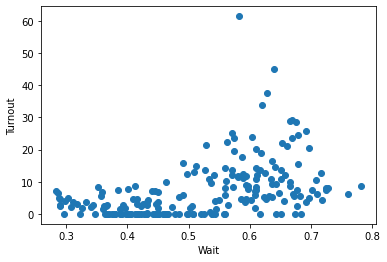

In [40]:
plt.scatter(df1_clean.vep_turnout, df1_clean.wait)
plt.xlabel('Wait')
plt.ylabel('Turnout')
plt.show()

In [41]:
y = df1_clean.vep_turnout

In [44]:
X = df1_clean.wait.values.reshape(-1, 1)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X, y)

LinearRegression()

In [47]:
y_pred = model.predict(X)
print(y_pred.shape)

(204,)


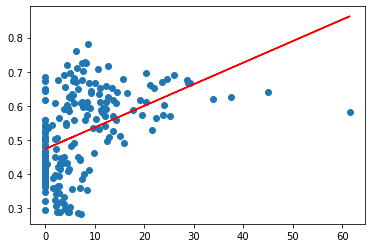

In [48]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [49]:
print(model.coef_)
print(model.intercept_)

[0.00632119]
0.4739437975866917
